In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-04-07 04:20:49--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

100%[======================================>] 72,629      --.-K/s   in 0.1s    

2020-04-07 04:20:50 (476 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



## Reading the data

In [3]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


In [5]:
cdf.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 6 columns):
ENGINESIZE              1067 non-null float64
CYLINDERS               1067 non-null int64
FUELCONSUMPTION_CITY    1067 non-null float64
FUELCONSUMPTION_HWY     1067 non-null float64
FUELCONSUMPTION_COMB    1067 non-null float64
CO2EMISSIONS            1067 non-null int64
dtypes: float64(4), int64(2)
memory usage: 50.1 KB


In [7]:
cdf.shape

(1067, 6)

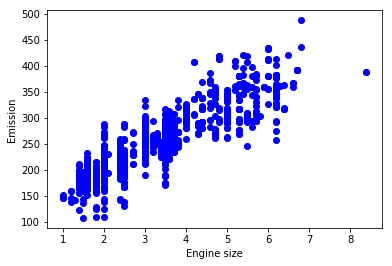

In [8]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [9]:
cdf.corr ()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,0.892129
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,1.000000


In [10]:
import seaborn as sns

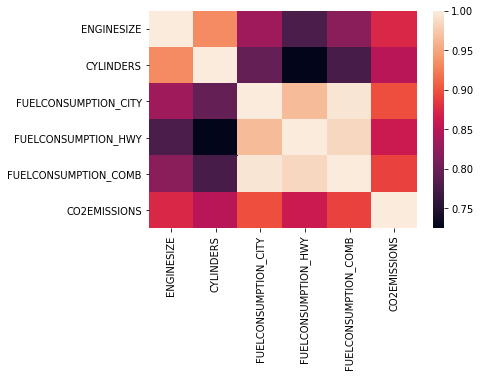

In [11]:
sns.heatmap (cdf.corr ())

In [14]:
msk = np.random.rand (len (df)) < 0.8
train = cdf [msk]
test = cdf [~msk]

In [15]:
from sklearn import linear_model

In [16]:
regr = linear_model.LinearRegression ()

In [27]:
x_train = np.asanyarray (train [['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])

In [28]:
y_train = np.asanyarray (train [['CO2EMISSIONS']])

In [29]:
regr.fit (x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
regr.intercept_

array([64.95525742])

In [31]:
regr.coef_

array([[10.55933971,  8.22865199,  9.3227671 ]])

In [25]:
y_hat = regr.predict (np.asanyarray (test [['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']]))

In [32]:
x_test = np.asanyarray (test [['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])

In [33]:
y_test = np.asanyarray (test [['CO2EMISSIONS']])

In [43]:
T = round (regr.score (x_test,y_test),2)
T

0.88

In [38]:
round (regr.score (x_test,y_hat),2)

1.0

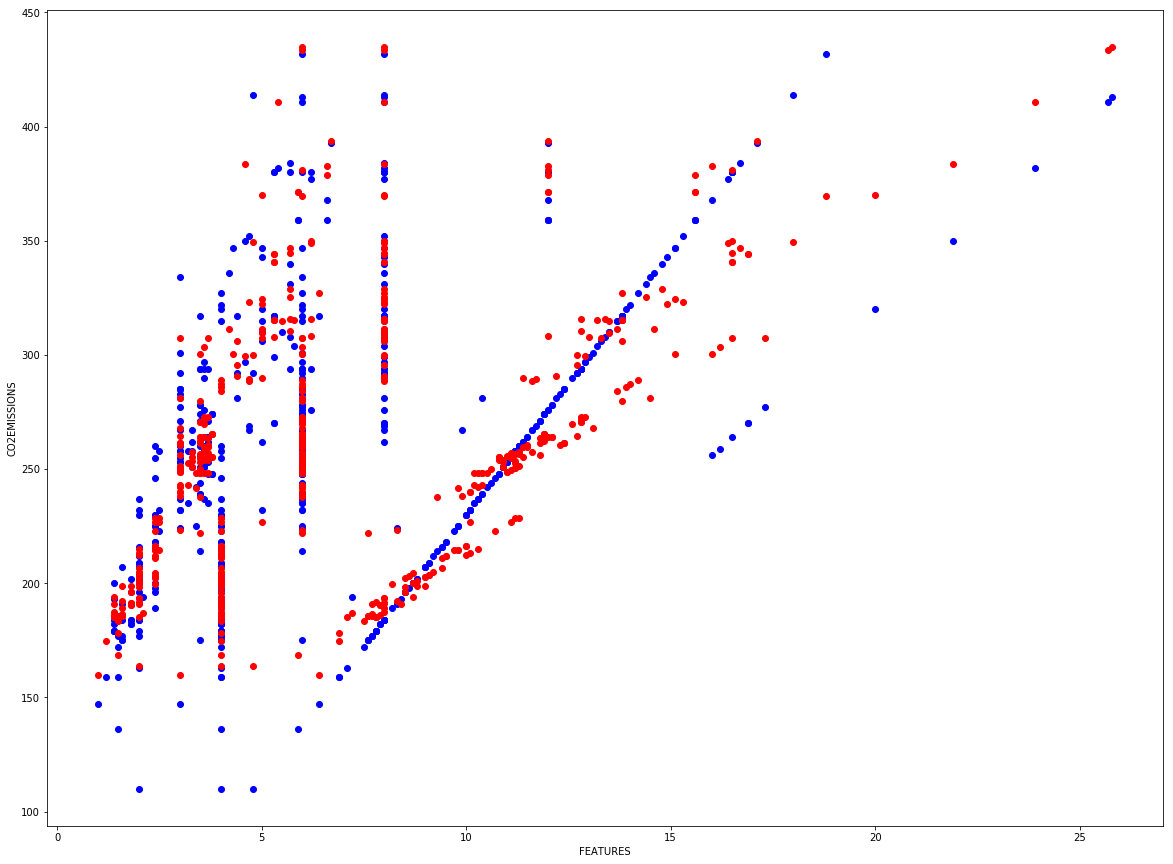

In [41]:
plt.figure (figsize = (20,15))
plt.plot (x_test, y_test, 'bo')
plt.plot (x_test, y_hat, 'ro')
plt.ylabel ('CO2EMISSIONS')
plt.xlabel ('FEATURES')
plt.show ()

In [45]:
print ('The Accuracy Score is {}.'.format (T))

The Accuracy Score is 0.88.
